In [2]:
import pandas as pd
import numpy as np
import jiwer
import jieba
import re
import opencc
import matplotlib.pyplot as plt
import cn2an
import seaborn as sns
from scipy import stats
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
data_whisper = pd.read_csv('/projectnb/ds549/projects/AImpower/evaluation-wav2vec/Whisper_large_evaluation.csv', index_col=0)
data_wenet = pd.read_csv('/projectnb/ds549/projects/AImpower/evaluation-wav2vec/WeNet_evaluation.csv', index_col=0)
data_azure = pd.read_csv('/projectnb/ds549/projects/AImpower/evaluation-wav2vec/Azure_evaluation.csv', index_col=0)
data_wav2vec = pd.read_csv('/projectnb/ds549/projects/AImpower/evaluation-wav2vec/Wav2vec_evaluation.csv', index_col=0)
data_googlecloud = pd.read_csv('/projectnb/ds549/projects/AImpower/evaluation-wav2vec/GoogleCloud_evaluation.csv', index_col=0)

In [4]:
#compirason
wer = [data_whisper['WER'].mean(), data_wenet['WER'].mean(), data_azure['WER'].mean(), data_wav2vec['WER'].mean(), data_googlecloud['WER'].mean()]
wer_rep = [data_whisper['WER_repetition'].mean(), data_wenet['WER_repetition'].mean(), data_azure['WER_repetition'].mean(), data_wav2vec['WER_repetition'].mean(), data_googlecloud['WER_repetition'].mean()]
cer = [data_whisper['CER'].mean(), data_wenet['CER'].mean(), data_azure['CER'].mean(), data_wav2vec['CER'].mean(), data_googlecloud['CER'].mean()]
cer_rep = [data_whisper['CER_repetition'].mean(), data_wenet['CER_repetition'].mean(), data_azure['CER_repetition'].mean(), data_wav2vec['CER_repetition'].mean(), data_googlecloud['CER_repetition'].mean()]
groups = ['whipser','wenet', 'azure', 'wav2vec', 'googlecloud']

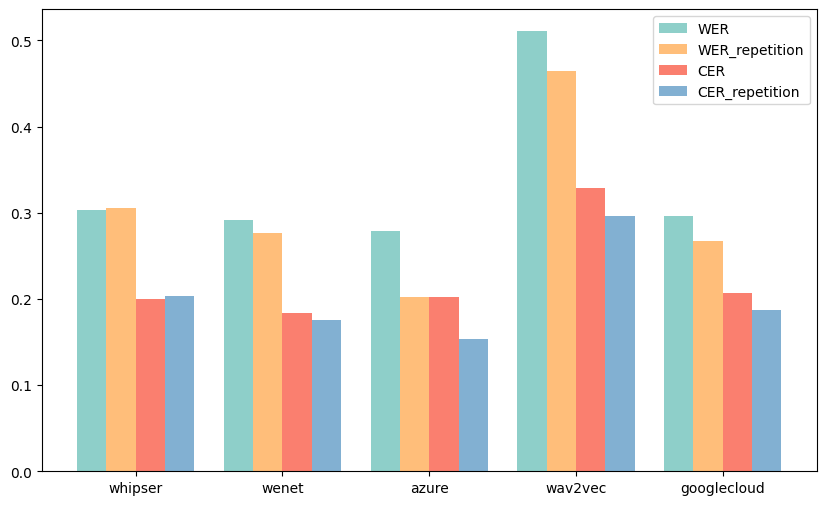

In [5]:
x = np.arange(len(groups)) 
width = 0.2  

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - 1.5 * width, wer, width, label='WER', color='#8ECFC9')
rects2 = ax.bar(x - 0.5 * width, wer_rep, width, label='WER_repetition', color='#FFBE7A')
rects3 = ax.bar(x + 0.5 * width, cer, width, label='CER', color='#FA7F6F')
rects4 = ax.bar(x + 1.5 * width, cer_rep, width, label='CER_repetition', color='#82B0D2')

colors = ['#8ECFC9', '#FFBE7A', '#FA7F6F', '#82B0D2']


ax.set_xticks(x)
ax.set_xticklabels(groups)
ax.legend()


In [6]:
#hallucination cosine similiraty

In [8]:
data = data_whisper

model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

predicted = data['Whisper_large'].tolist()
ground_truth = data['ground_truth_cleaned_with_repetition'].tolist()

predicted_embeddings = model.encode(predicted)
ground_truth_embeddings = model.encode(ground_truth)

In [9]:
data['predicted_embeddings'] = list(predicted_embeddings)
data['ground_truth_embeddings'] = list(ground_truth_embeddings)

In [10]:
data.iloc[707]['predicted_embeddings']

array([-4.16370779e-01,  1.09939051e+00,  2.45880932e-02,  2.05252767e-01,
       -5.65228522e-01,  2.92860717e-02,  1.42887902e+00,  1.33431315e-01,
        5.92621326e-01, -3.35586742e-02,  6.15681827e-01, -1.02547431e+00,
        6.09538376e-01, -1.40167698e-02,  4.41723645e-01,  1.51301309e-01,
        4.18181241e-01,  5.07135987e-01, -1.24592412e+00, -3.07059512e-02,
        1.36457711e-01,  3.97800624e-01, -3.49100083e-02, -7.50157386e-02,
        3.93660754e-01,  1.05227470e-01, -6.74192794e-04,  3.60376596e-01,
        8.20308447e-01,  3.91174972e-01,  1.86399400e-01,  7.67664552e-01,
        1.94240734e-01,  4.66802239e-01,  4.21512842e-01,  3.31118286e-01,
        1.13336228e-01, -3.91454287e-02,  4.58687365e-01,  1.56792343e-01,
        6.25052899e-02, -1.00969449e-01,  2.74024874e-01,  3.85809213e-01,
        3.96515690e-02,  5.17532468e-01,  2.43695095e-01,  1.14713594e-01,
       -5.67391515e-01,  4.19014543e-01, -6.55468106e-01,  1.06381252e-03,
       -1.81364506e-01,  

In [11]:
cosine = []
for i in range (len(data)):
    cosine.append(cosine_similarity([data.iloc[i]['predicted_embeddings']], [data.iloc[i]['ground_truth_embeddings']])[0][0])
data['coisine_sim'] = list(cosine)

In [12]:
data.describe()

,start_time,end_time,WER,CER,WER_repetition,CER_repetition,duration,stutterance_count,character_count,character_count_repetition,stutterance_frequency,stutterance_frequency_time,word,r,i,p,b,coisine_sim
count,37202.000000,37202.000000,37202.000000,37202.000000,37202.000000,37202.000000,37202.000000,37202.000000,37202.000000,37202.000000,37202.000000,37202.000000,37202.000000,37202.000000,37202.000000,37202.000000,37202.000000,37202.000000
mean,1974.723674,1979.482558,0.303410,0.199363,0.305933,0.203320,4.758884,1.010053,14.872238,15.682813,0.070966,0.146949,0.456131,0.104188,0.183297,0.192973,0.073464,0.973125
std,1026.391961,1024.583690,0.455199,0.343015,0.403099,0.299322,3.753245,1.703391,13.683941,14.459909,0.161997,0.229752,0.957034,0.381001,0.536787,0.543271,0.319699,0.071697
min,0.490000,0.840000,0.000000,0.000000,0.000000,0.000000,0.220000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015112
25%,1124.042500,1132.190000,0.000000,0.000000,0.000000,0.000000,1.910000,0.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.984557
50%,2107.215500,2110.158000,0.146700,0.095238,0.181818,0.111111,3.340000,0.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.998378
75%,2769.481000,2772.629000,0.428571,0.250000,0.454545,0.272727,6.803063,1.000000,20.000000,22.000000,0.083333,0.257069,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,4157.869000,4168.639000,18.666667,20.000000,16.000000,20.000000,32.330000,17.000000,118.000000,126.000000,5.000000,2.166065,11.000000,7.000000,6.000000,9.000000,5.000000,1.000000


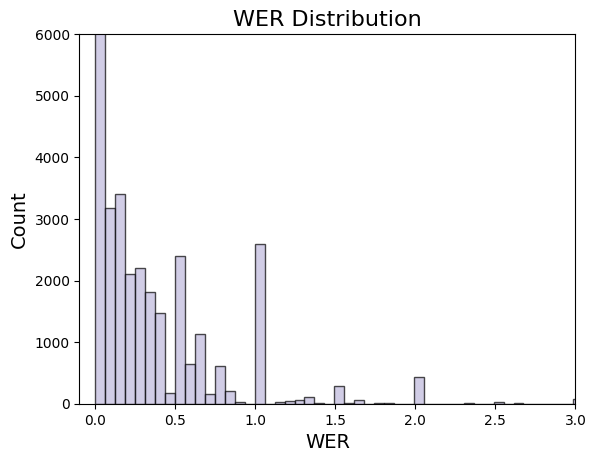

In [13]:
#WER
plt.hist(data['WER'], bins =300, color='#BEB8DC', edgecolor='black', alpha=0.7)
plt.title("WER Distribution", fontsize=16)
plt.xlabel("WER", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xlim(-0.1,3)
plt.ylim(0,6000)
plt.show()

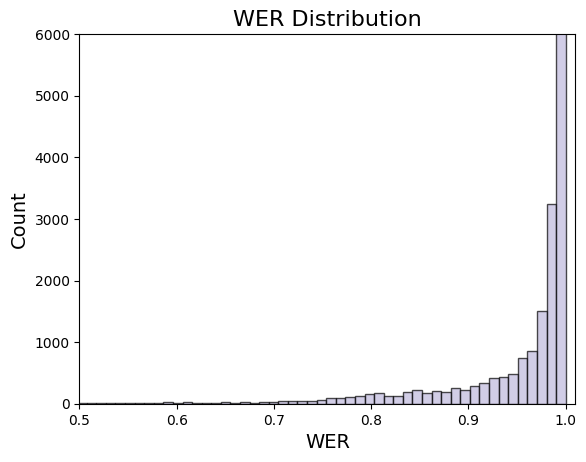

In [14]:
#conisine
plt.hist(data['coisine_sim'], bins =100, color='#BEB8DC', edgecolor='black', alpha=0.7)
plt.title("WER Distribution", fontsize=16)
plt.xlabel("WER", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xlim(0.5,1.01)
plt.ylim(0,6000)
plt.show()

In [15]:
data_stutter = data[data['stutterance_count']>0]
data_non_stutter = data[data['stutterance_count']==0]

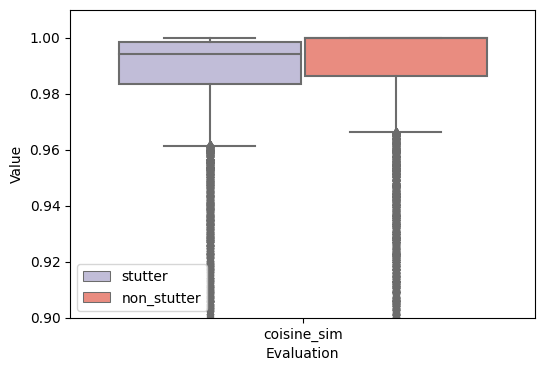

In [16]:
data_stutter_number = data_stutter[['coisine_sim']].melt(var_name='Evaluation', value_name='Value')
data_stutter_number['Group'] = 'stutter'
data_non_stutter_number = data_non_stutter[['coisine_sim']].melt(var_name='Evaluation', value_name='Value')
data_non_stutter_number['Group'] = 'non_stutter'
combined_data = pd.concat([data_stutter_number, data_non_stutter_number])

fig,ax = plt.subplots(figsize=(6, 4))
custom_palette = ['#BEB8DC', '#FA7F6F']
sns.boxplot(data=combined_data, x='Evaluation', y='Value', hue='Group', palette=custom_palette, ax=ax)
ax.set_ylim(0.9, 1.01) 
plt.title("")
plt.legend()
plt.show()

In [17]:
data_outliers = data[data['coisine_sim']>0.9]
data_outliers = data_outliers[data_outliers['CER']<1.25]
data_outliers = data[~data.index.isin(data_outliers.index)]
data_outliers

,file,start_time,end_time,ground_truth,ground_truth_cleaned,Whisper_large,ground_truth_cleaned_with_repetition,WER,CER,WER_repetition,...,stutterance_frequency,stutterance_frequency_time,word,r,i,p,b,predicted_embeddings,ground_truth_embeddings,coisine_sim
8,D0001_A,150.850000,154.010,那我是。,那我是,这样过evet,那我是,1.000000,2.333333,1.000000,...,0.000000,0.000000,0,0,0,0,0,"[-0.3519326, 0.8531054, 0.5192364, -0.6726862,...","[-0.57373965, 1.2027657, -0.27705073, 0.108800...",0.562448
48,D0001_A,860.150000,868.180,前两天呢看了一部呃/i就是叫。,前两天呢看了一部就是叫,前两天呢看我一步就是叫,前两天呢看了一部呃就是叫,0.285714,0.181818,0.375000,...,0.090909,0.124533,0,0,1,0,0,"[-0.40245894, 1.00688, 0.030201545, 0.07493946...","[-0.66783035, 1.0408359, -0.02958378, -0.09992...",0.834217
86,D0001_A,1499.113758,1506.110,但/b是呃/i他/r。,但是他,他,但是呃他,0.500000,0.666667,0.666667,...,1.000000,0.428802,0,1,1,0,1,"[-0.4165446, 0.6067341, 0.038340356, -0.361316...","[-0.55787677, 0.55090445, 0.33153346, -0.29519...",0.863950
89,D0001_A,1542.170000,1542.910,优。,优,有,优,1.000000,1.000000,1.000000,...,0.000000,0.000000,0,0,0,0,0,"[-0.39443454, 0.59339017, -0.11637357, 0.17415...","[-0.4165446, 0.6067341, 0.038340356, -0.361316...",0.618728
90,D0001_A,1548.940000,1561.910,优柔寡断的，嗯/i然/r/b[然]后但/b是呢他[他]一路呢就[就]开挂，因为那个人。,优柔寡断的然后但是呢他一路呢就开挂因为那个人,丢了我寡断的然后但是呢他他一路呢就就挨挂因为那个,优柔寡断的嗯然然后但是呢他他一路呢就就开挂因为那个人,0.692308,0.318182,0.470588,...,0.318182,0.539707,3,1,1,0,2,"[-0.1420534, 1.1136026, 0.09536135, -0.0318232...","[-0.41663307, 0.96811306, 0.114773475, -0.3255...",0.887630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37156,P0070,2658.086000,2660.366,甄嬛传在哪些台播过。,甄嬛传在哪些台播过,金环转在哪些台播过,甄嬛传在哪些台播过,0.428571,0.333333,0.428571,...,0.000000,0.000000,0,0,0,0,0,"[-0.8046658, 1.1111965, -0.17829925, -0.187264...","[-0.38385484, 0.43868133, 0.53044266, -0.25199...",0.737142
37193,P0070,2788.006000,2789.816,戚薇的电影处女作。,戚薇的电影处女作,西部的电影处女座,戚薇的电影处女作,0.500000,0.375000,0.500000,...,0.000000,0.000000,0,0,0,0,0,"[-0.3222786, 1.0670525, -0.22009268, -0.010204...","[-0.31531316, 0.93370134, 0.14799444, -0.26219...",0.884937
37213,P0070,2874.336000,2877.136,你好，米雅，旁边电影院分布。,你好米雅旁边电影院分布,你好米娅旁边电影院分部,你好米雅旁边电影院分布,0.400000,0.181818,0.400000,...,0.000000,0.000000,0,0,0,0,0,"[-0.66316795, 0.99331826, -0.15517381, -0.0555...","[-0.51128334, 0.3813531, 0.38366133, -0.193978...",0.824181
37220,P0070,2906.496000,2910.226,你好，米雅，拨打到李雷的号。,你好米雅拨打到李雷的号,你好米亚报道到李雷的号,你好米雅拨打到李雷的号,0.285714,0.272727,0.285714,...,0.000000,0.000000,0,0,0,0,0,"[-0.27320412, 1.002407, -0.3065011, -0.5312579...","[-0.27166316, 0.9074555, 0.31630993, -0.310937...",0.886277
